In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
# Membaca file CSV
file_path = '/content/drive/My Drive/ml-destinasi-wisata/destinasi-wisata-indonesia.csv'
try:
    data = pd.read_csv(file_path)
    print("File berhasil dibaca.")
except FileNotFoundError:
    print(f"File tidak ditemukan di lokasi: {file_path}. Pastikan path sudah benar.")
    raise

File berhasil dibaca.


In [12]:
# Memuat data destinasi
data.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Column1,_1,Rating_Count
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,46,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-61753924,1068271528,NaN,1,18
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,46,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-61376448,1068171245,NaN,2,25
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,46,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-61253124,1068335377,NaN,3,19
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,45,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-63024459,1068951559,NaN,4,21
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,45,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-612419,106839134,NaN,5,24


In [13]:
# 1. Preprocessing Data
# Menghapus kolom yang tidak relevan
if {'Place_Id', 'Description', 'Coordinate', 'Column1', '_1'}.issubset(data.columns):
    data = data.drop(columns=['Place_Id', 'Description', 'Coordinate', 'Column1', '_1'])
else:
    print("Beberapa kolom yang akan dihapus tidak ditemukan dalam data.")

In [14]:

# Mengisi nilai kosong di kolom Time_Minutes dengan nilai rata-rata
if 'Time_Minutes' in data.columns:
    data['Time_Minutes'] = data['Time_Minutes'].fillna(data['Time_Minutes'].mean())
else:
    print("Kolom 'Time_Minutes' tidak ditemukan dalam data.")

In [15]:
# Konversi data kategorikal menjadi numerik menggunakan encoding
for col in data.select_dtypes(include=['object']).columns:
    data[col] = data[col].astype('category').cat.codes

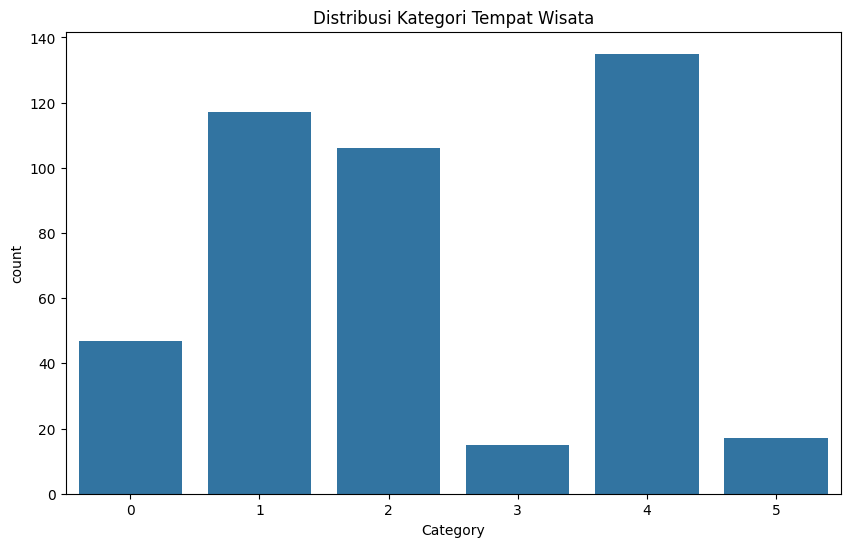

In [16]:

# 2. Exploratory Data Analysis
if 'Category' in data.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x='Category', data=data)
    plt.title('Distribusi Kategori Tempat Wisata')
    plt.show()
else:
    print("Kolom 'Category' tidak ditemukan untuk analisis distribusi.")

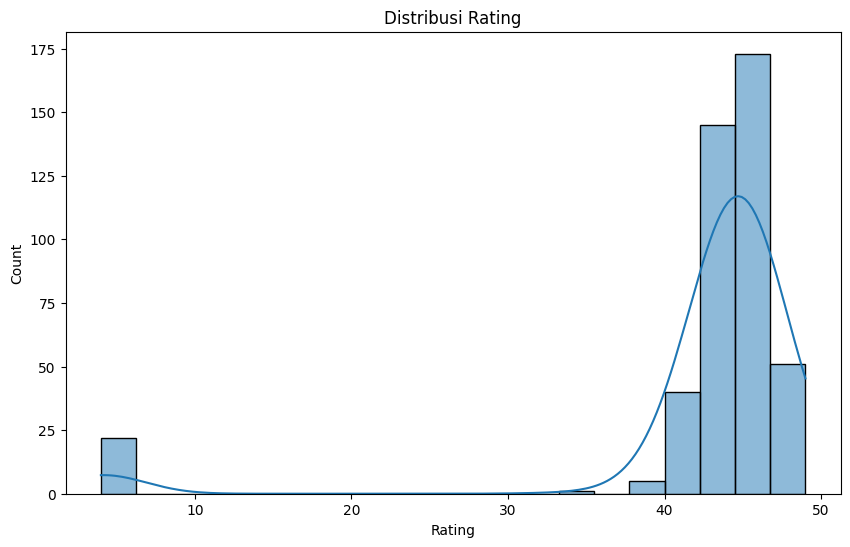

In [17]:
if 'Rating' in data.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data['Rating'], kde=True, bins=20)
    plt.title('Distribusi Rating')
    plt.show()
else:
    print("Kolom 'Rating' tidak ditemukan untuk analisis distribusi.")

In [18]:
# 3. Machine Learning - Prediksi Kategori Berdasarkan Fitur Lain
if 'Category' in data.columns:
    # Memisahkan fitur dan target
    X = data.drop(columns=['Category'])
    y = data['Category']

    # Membagi data menjadi training dan testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Membuat model Random Forest
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)

    # Evaluasi model
    predictions = model.predict(X_test)

    print("Classification Report:")
    print(classification_report(y_test, predictions))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, predictions))
    print(f"Accuracy: {accuracy_score(y_test, predictions) * 100:.2f}%")
else:
    print("Kolom 'Category' tidak ditemukan. Tidak dapat melanjutkan machine learning.")


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         9
           1       0.75      0.78      0.77        23
           2       0.56      0.53      0.55        17
           3       1.00      0.60      0.75         5
           4       0.61      0.79      0.69        28
           5       1.00      0.50      0.67         6

    accuracy                           0.69        88
   macro avg       0.82      0.64      0.70        88
weighted avg       0.73      0.69      0.69        88

Confusion Matrix:
[[ 6  0  1  0  2  0]
 [ 0 18  1  0  4  0]
 [ 0  0  9  0  8  0]
 [ 0  2  0  3  0  0]
 [ 0  1  5  0 22  0]
 [ 0  3  0  0  0  3]]
Accuracy: 69.32%
